In [2]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#import and preview data
data = pd.read_csv('data.csv')
data.head(5)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [20]:
#second order polynomial fit
z = np.polyfit(data['GrLivArea'], data['SalePrice'], 2)
x = data['GrLivArea']#np.arange(min(data['GrLivArea']), max(data['GrLivArea']))
y = (z[0]*(x**2)) + (z[1]*x) + z[2]

#determine r2, r, and p-value
print("R2 = ",sklearn.metrics.r2_score(data['SalePrice'], y))
print('Pearson Coefficient: ',scipy.stats.pearsonr(data['GrLivArea'], data['SalePrice'])[0])
print('p - value: ',scipy.stats.ttest_ind(data['GrLivArea'], data['SalePrice'])[1])

R2 =  0.508504842437747
Pearson Coefficient:  0.7086244776126513
p - value:  0.0


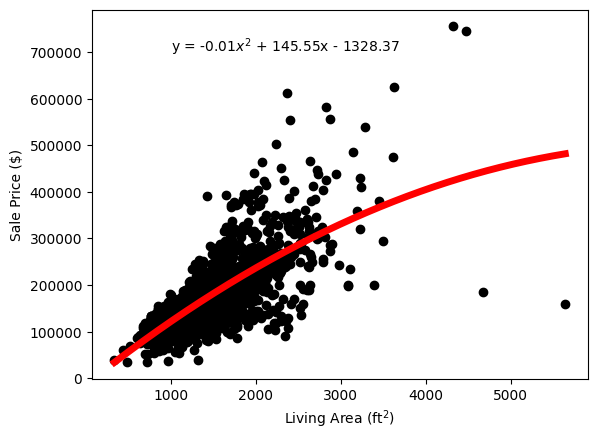

In [13]:
#plot data and second order polynomial fit
plt.scatter(data['GrLivArea'], data['SalePrice'], color='black')
plt.plot(x, y, color='red', linewidth=5)
plt.ylabel('Sale Price ($)')
plt.xlabel('Living Area (ft$^2$)')
plt.text(1000,700000, 'y = -0.01$x^2$ + 145.55x - 1328.37')
plt.savefig('housingreg.png', bbox_inches='tight')